<a href="https://colab.research.google.com/github/Laureoby/titanic_dataset/blob/main/Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# prompt: nettoie les Nan values de la colonne Age en utilisant les moyennes en fonction de la moyenne des valeurs Male et Femelle présente dans la colonne Sex
male_avg_age = data[data['Sex'] == 'male']['Age'].mean()
female_avg_age = data[data['Sex'] == 'female']['Age'].mean()

def impute_age(row):
  if pd.isna(row['Age']):
    if row['Sex'] == 'male':
      return male_avg_age
    else:
      return female_avg_age
  else:
    return row['Age']

data['Age'] = data.apply(impute_age, axis=1)

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [8]:
data.dropna(inplace=True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [10]:
data['Cabin'].unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',
       'C90

In [11]:
# prompt: Encode pour moi les valeurs contenues dans la colonne Sex avec Male qui est égale à 1 et femelle égale à 0
data['Sex'] = data['Sex'].apply(lambda x: 0 if x == 'male' else 1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,B96 B98,S


In [12]:
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,B96 B98,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,B96 B98,0


**Data visualization**

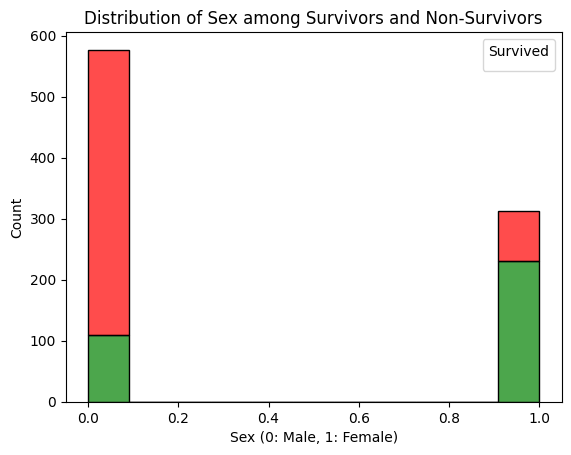

In [14]:
# prompt: génère moi un histogramme qui me permet de voir la répartition des Sexes (colonne Sex) en fonction de ceux qui ont survecu (colonne Survived) et mets les labels sur l'histogramme obtenu
sns.histplot(
    data=data,
    x="Sex",
    hue="Survived",
    multiple="stack",
    palette=["red", "green"],
    alpha=0.7,
)
plt.xlabel("Sex (0: Male, 1: Female)")
plt.ylabel("Count")
plt.title("Distribution of Sex among Survivors and Non-Survivors")
plt.legend(title="Survived")
plt.show()


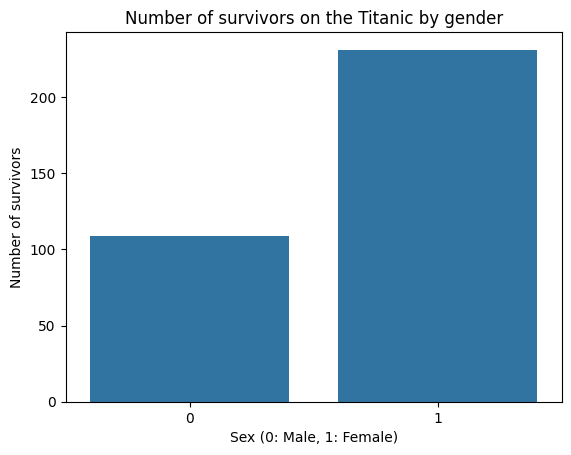

In [18]:
# Filter the necessary columns and calculate the number of survivors by gender
survivors_by_sex = data.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Create a histogram to visualize the number of survivors by gender
sns.barplot(data=survivors_by_sex, x=survivors_by_sex.index, y=1)  # 1 indicates survivors
plt.title('Number of survivors on the Titanic by gender')
plt.xlabel("Sex (0: Male, 1: Female)")
plt.ylabel("Number of surviors")
plt.show()

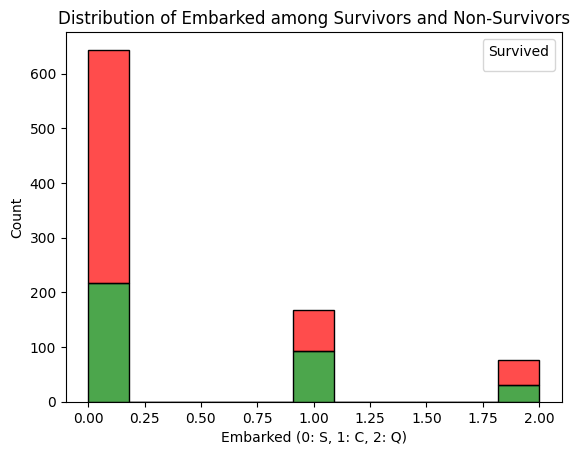

In [19]:
# prompt: génère pour moi un graphique qui me permet de voir les valeurs de la colonne Embarked en fonction de la colonne Survived et mets les labels correspondants pour la colonne Embarked
sns.histplot(
    data=data,
    x="Embarked",
    hue="Survived",
    multiple="stack",
    palette=["red", "green"],
    alpha=0.7,
)
plt.xlabel("Embarked (0: S, 1: C, 2: Q)")
plt.ylabel("Count")
plt.title("Distribution of Embarked among Survivors and Non-Survivors")
plt.legend(title="Survived")
plt.show()

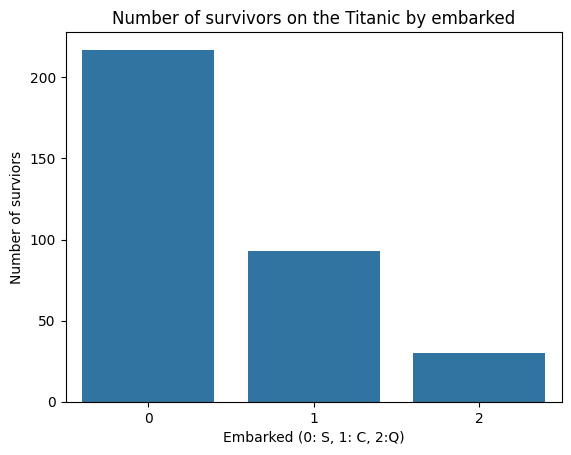

In [20]:
# Filter the necessary columns and calculate the number of survivors by embark
survivors_by_embark = data.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

# Create a histogram to visualize the number of survivors by gender
sns.barplot(data=survivors_by_embark, x=survivors_by_embark.index, y=1)  # 1 indicates survivors
plt.title('Number of survivors on the Titanic by embarked')
plt.xlabel("Embarked (0: S, 1: C, 2:Q)")
plt.ylabel("Number of surviors")
plt.show()